### Imports

In [1]:
import numpy as np
import pandas as pd # to hold data
from sklearn.metrics import accuracy_score # to score predictions
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier # algorithm used
from sklearn.model_selection import train_test_split # make easier to split training and testing data

### Cleaning Data

In [2]:
df = pd.read_csv('Data-Files/iris.csv', index_col='Id')
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
# converting Species column into numbers
df['Species'] = df['Species'].apply(lambda x: x.replace('Iris-setosa', '1'))
df['Species'] = df['Species'].apply(lambda x: x.replace('Iris-versicolor', '2'))
df['Species'] = df['Species'].apply(lambda x: x.replace('Iris-virginica', '3'))
df['Species'] = pd.to_numeric(df['Species'])
df = df.sample(frac=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
51,7.0,3.2,4.7,1.4,2
134,6.3,2.8,5.1,1.5,3
70,5.6,2.5,3.9,1.1,2
120,6.0,2.2,5.0,1.5,3
135,6.1,2.6,5.6,1.4,3


### Organising Data

In [4]:
x = df[[column for column in df.columns if column != 'Species']]
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

### Training and Predicting

In [5]:
model = DecisionTreeClassifier()

# training model
model.fit(x_train, y_train)

# making predictions and scoring it
predictions = model.predict(x_test)
score = accuracy_score(predictions, y_test)

### Scoring

In [6]:
print('Predictions')
print(predictions)
print('\nActual Values')
print(np.array(y_test))
print(f'Score: {score}')

Predictions
[2 3 3 1 2 1 1 2 3 2 2 2 2 1 3 2 3 3 1 1 3 2 3 3 2 1 3 3 3 1]

Actual Values
[2 3 3 1 2 1 1 2 3 2 3 2 2 1 3 2 3 3 1 1 3 2 3 3 2 1 2 3 3 1]
Score: 0.9333333333333333


### Tree

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 40, 38]'),
 Text(125.55000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(209.25, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 40, 38]'),
 Text(167.4, 126.83999999999999, 'X[2] <= 5.05\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(83.7, 90.6, 'X[3] <= 1.65\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(41.85, 54.359999999999985, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(125.55000000000001, 54.359999999999985, 'X[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(83.7, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(251.10000000000002, 90.6, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(209.25, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(292.95, 5

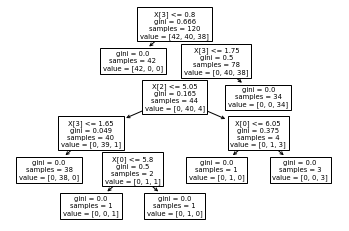

In [7]:
plot_tree(model)